# Question 4: Data Visualization

## 1. Walking speed analysis

### Walking Speed by Age

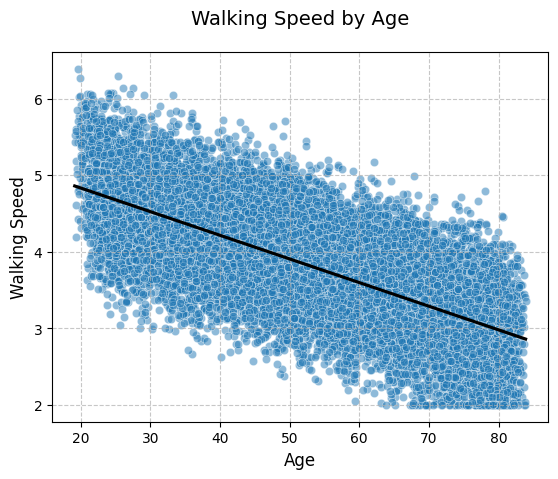

Linear Regression Model: walking_speed = (5.452473307131068)*age + (-0.030895896859055052)


<Figure size 640x480 with 0 Axes>

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

df = pd.read_csv('ms_data_insurance.csv')
model1 = smf.ols(data=df, formula='walking_speed~age')
results1 = model1.fit()

sns.scatterplot(data=df, x='age', y='walking_speed', alpha=0.5, markers='.')
sns.regplot(data=df, 
            x='age',
            y='walking_speed',
            color='black',
            scatter=False,
            fit_reg=True,
)
plt.title('Walking Speed by Age', fontsize=14, pad=20)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Walking Speed', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()
plt.clf()
print(f'Linear Regression Model: walking_speed = ({results1.params.iloc[0]})*age + ({results1.params.iloc[1]})')

### Walking Speed by Education Level

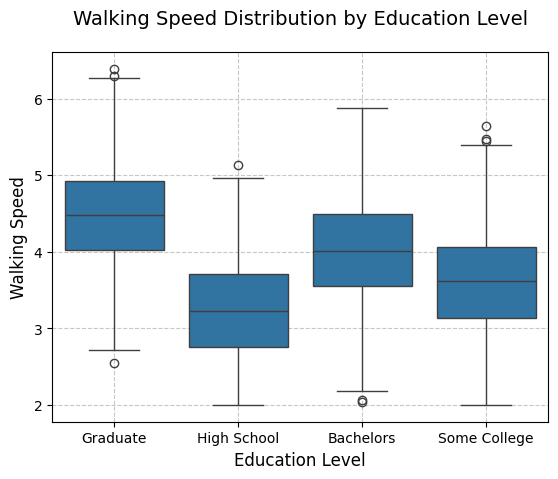

<Figure size 640x480 with 0 Axes>

In [33]:
ax = sns.boxplot(data=df,
                 x='education_level',
                 y='walking_speed'
                 )
plt.title('Walking Speed Distribution by Education Level', fontsize=14, pad=20)
plt.xlabel('Education Level', fontsize=12)
plt.ylabel('Walking Speed', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()
plt.clf()

### Education Level and Age Interaction on walking Speed

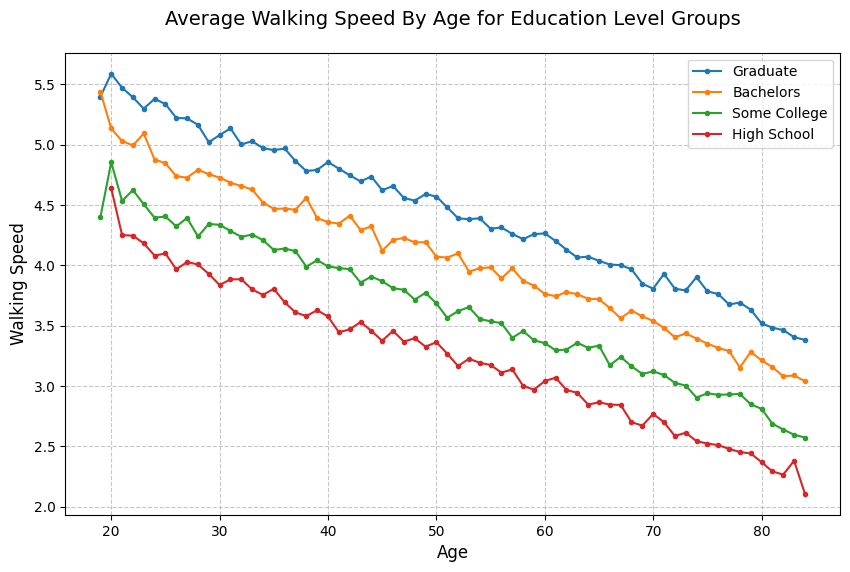

<Figure size 640x480 with 0 Axes>

In [35]:
import numpy as np

edu_levels = np.unique(df['education_level'])

# separate data by education levels and perform the following operations
df_bach = df[df['education_level']==edu_levels[0]].sort_values(by='age') # sort in order of age
df_bach['age'] = np.round(df_bach['age']) # round ages to nearest whole number
df_bach_means = df_bach.groupby('age')['walking_speed'].mean() # get the mean walk speed of all observations of each age value

df_grad = df[df['education_level']==edu_levels[1]].sort_values(by='age')
df_grad['age'] = np.round(df_grad['age'])
df_grad_means = df_grad.groupby('age')['walking_speed'].mean()

df_high = df[df['education_level']==edu_levels[2]].sort_values(by='age')
df_high['age'] = np.round(df_high['age'])
df_high_means = df_high.groupby('age')['walking_speed'].mean()

df_coll = df[df['education_level']==edu_levels[3]].sort_values(by='age')
df_coll['age'] = np.round(df_coll['age'])
df_coll_means = df_coll.groupby('age')['walking_speed'].mean()

plt.figure(figsize=(10,6))
plt.plot(df_grad_means.index.values, df_grad_means, marker='.', label="Graduate")
plt.plot(df_bach_means.index.values, df_bach_means, marker='.', label="Bachelors")
plt.plot(df_coll_means.index.values, df_coll_means, marker='.', label="Some College")
plt.plot(df_high_means.index.values, df_high_means, marker='.', label="High School")
plt.cm.Set2
plt.title('Average Walking Speed By Age for Education Level Groups', fontsize=14, pad=20)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Walking Speed', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=10)
plt.show()
plt.clf()